<a href="https://colab.research.google.com/github/StevenVuong/MSc_Project/blob/master/misc4(diagnostics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ALL THE IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# other imports to handle files
import os
import pickle
import csv

# deep learning imports
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, Convolution1D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils, generic_utils, to_categorical
from keras.layers import LeakyReLU
from keras import regularizers

# to split our dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# to mount our drive
from google.colab import drive

Using TensorFlow backend.


In [0]:
# MOUNT THE STORAGE
drive.mount('/content/gdrive')

os.chdir('/content')

# go to where we will be working
print (os.listdir())
os.chdir('gdrive/My Drive/msc_project/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['.config', 'gdrive', 'sample_data']


**Purpose of this notebook is to create metrics for our final presentation/graphs of everything we might need etc..**

In [0]:
# https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model
# Build confusion matrices for train and test data
# 3d is in Step3, need to run metrics on 4th batch of processed_brains_aug
# 2d is in misc3, need to run prediction metrics on 4th batch of processed_brains_aug also
# age/sex is in misc2 and runs off the larger dataset, pulling from the Control CSV.

Best models so far:
-  74.138% on the 3D brainscans, model 80
-  100% on the 2D brainscans(slice86), model keep100
-  76.667% on the Age/Sex values, each have a deep learning model
  

Metrics to present:
 <br>
-  Final accuracy and losses
-  Graphs of training accuracy and losses
-  Confusion Matrices
-  Deep learning architecture diagrams
-  Distrubition of population, age/sex


Information to gather:
<br>
-  Quality of each of the samples, where they came from. Distribution, sizes etc..

In [0]:
## Architecture Diagrams http://alexlenail.me/NN-SVG/AlexNet.html

 Attempt at confusion matrix here**
 <br>
Logic:
-  Load model, load the data for both train and test
-  Get true values, get predicted values for both train and test
-  Convert back to binary
-  Input into confusion matrix

In [0]:
def to_binary(cat_array):
  '''Function to convert categorical back to binary values'''
  binary_output_array = []
  for i in range(len(cat_array)):
    binary_output_array.append(np.argmax(cat_array[i]))
    
  binary_output_array = np.array(binary_output_array)
  return binary_output_array

In [0]:
def get_86_slice(ts):
  '''Gets the 86th slice and return this'''
  returned_array = []
  for ax_slice in total_slices:
    returned_array.append(ax_slice[86,:,:,0])
    
  returned_array = np.array(returned_array)
  return returned_array

In [0]:
# gets our y-values and converts to keras, one hot encoded outputs
def get_y_values(total_slices_info):
  
  y_values = [s[2] for s in total_slices_info]

  y_values = np.array(to_categorical(y_values, 2))
  
  return y_values

**BELOW IS FOR OUR 2D BRAINSCANS**

In [0]:
## Load our model, start with 100% accuracy model on the 2d scans
# model_2dscans = pickle.load( open( "all_mprage_grappa/z_tests/keep_models/100Model(2dscans).pkl", "rb" ) )

# For 3D scans
model = load_model('all_mprage_grappa/stored_models/model4x/model40_aug_v0.h5') # need to go over again and redo accuracy metrics

In [0]:
## RUNNING THROUGH TRAINING DATA ##
## Loop through all our total slices and accumulate all the total slices info
training_batch_f = os.listdir('all_mprage_grappa/processed_brains/processed_brains_aug/')[:5]
print (training_batch_f)

# initialise our set of predicted outputs
y_train_real = []
y_train_preds = [] 
patient_train_info = []
# Just loop through once because we want to predict using our model only
for tbf in training_batch_f:
  with open('all_mprage_grappa/processed_brains/processed_brains_aug/'+tbf, 'rb') as f:
    total_slices, total_slices_info = pickle.load(f) 

  # get y values and process each slice
  y_values = get_y_values(total_slices_info)
  # slices_86 = get_86_slice(total_slices) # get 86th slice
  # slices_86 = np.expand_dims(slices_86, axis=3)

  # append patient information
  patient_train_info.extend(total_slices_info)

  # Make predictions on our slices
  # train_predict = model_2dscans.predict(x=slices_86)
  # train_predict = model.predict(total_slices)
  # y_train_preds.extend(train_predict)
  # y_train_real.extend(y_values)
      
# set of batches that we will predict
patient_train_info = np.array(patient_train_info)
# y_train_preds = np.array(y_train_preds)
# y_train_real = np.array(y_train_real)

['dbatch0.pkl', 'dbatch1.pkl', 'dbatch2.pkl', 'dbatch3.pkl', 'dbatch4.pkl']


In [0]:
np.shape(patient_train_info)

(440, 4)

In [0]:
## RUNNING THROUGH TEST DATA ##
with open('all_mprage_grappa/processed_brains/processed_brains_aug/dbatch3.pkl', 'rb') as f:
  total_slices, total_slices_info = pickle.load(f) 

# get y values and process each slice
y_values = get_y_values(total_slices_info)
slices_86 = get_86_slice(total_slices) # get 86th slice
slices_86 = np.expand_dims(slices_86, axis=3)

# Turn into numpy arrays
y_test_preds = np.array(model_2dscans.predict(x=slices_86))
y_test_real = np.array(y_values)
patient_test_info = np.array(total_slices_info)

FileNotFoundError: ignored

In [0]:
# turn into a dataframe
train_df = pd.DataFrame(patient_train_info)
train_df.columns=['ImageID', 'Gender', 'Group', 'Age']
train_df = train_df[::2] # take every second row (Because we have duplicates)

# turn age to integers
train_df['Age'] = train_df['Age'].astype(int)

train_df.head()

,ImageID,Gender,Group,Age
0,440184,F,1,56
2,417039,M,0,73
4,344401,M,0,68
6,269591,M,0,67
8,397621,M,1,63


In [0]:
# count number with PD and number of controls, 0 is Control, 1 is PD
np.unique(train_df.Group, return_counts=True) # 337 patients

(array(['0', '1'], dtype=object), array([ 97, 123]))

In [0]:
# establish control and pd df's
df_control = train_df[train_df.Group == '0'] # for control, keep duplicate subject n.o's
df_pd = train_df[train_df.Group == '1'] # so we keep duplicates for both groups anyhow

In [0]:
print ("Number of control patients: %d " % len(df_control))
print ("Number of PD patients: %d " % len(df_pd))

Number of control patients: 97 
Number of PD patients: 123 


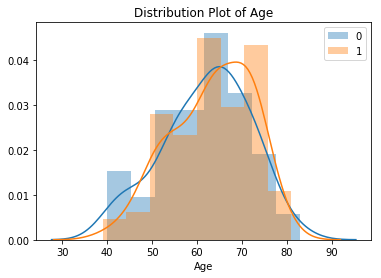

In [0]:
# seaborn distribution plot
sns.distplot(df_control.Age, rug=False, label='0')
sns.distplot(df_pd.Age, rug=False, label='1')
plt.title('Distribution Plot of Age')
plt.legend()
plt.show() # pd has a slightly older distribution than control

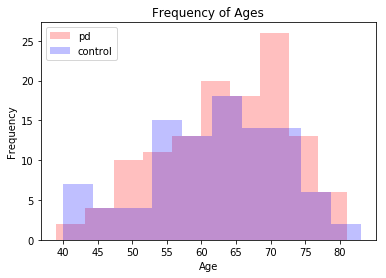

In [0]:
# plot for the ages
plt.hist(df_pd.Age, align='mid', alpha=0.25, color='r', label='pd', bins=10)
plt.hist(df_control.Age, align='mid', alpha=0.25, color='b', label='control', bins=10)
plt.legend(loc='upper left')

# set labels
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Ages')

# set ticks
plt.xticks(np.arange(min(df_control.Age), max(df_control.Age)+1, 5.0))
plt.show()

Text(0.5, 1.0, 'Distribution of age for M/F')

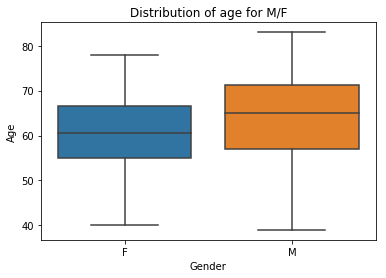

In [0]:
# some boxplots
ax = sns.boxplot(x="Gender", y="Age", data=train_df)
plt.title("Distribution of age for M/F")

In [0]:
print ("For Control:")
print (np.unique(df_control.Gender.values, return_counts=True))
print ("For PD")
print (np.unique(df_pd.Gender.values, return_counts=True)) # very visible from results males are more likely to get pd..

For Control:
(array(['F', 'M'], dtype=object), array([37, 60]))
For PD
(array(['F', 'M'], dtype=object), array([43, 80]))


In [0]:
# Turn to binary outputs
y_test_preds_binary = to_binary(y_train_preds)
y_test_real_binary = to_binary(y_train_real)

# MAKE CONFUSION MATRIX, can also do the same for train data
confusion_matrix(y_test_real_binary, y_test_preds_binary)

array([[134,  28],
       [ 25, 195]])

In [0]:
## Then test with /dbatch3.pkl

**BELOW IS FOR OUR 3D BRAINSCANS (same training and test as our binary? Work in progress right now)**

**BELOW IS FOR OUR AGE/SEX MODEL**

In [0]:
  # import our dataset
  big_boi_df = pd.read_csv('all_mprage_grappa/Control_PD_6_21_2019.csv') # different split
  
  # remove duplicate subject ids
  big_boi_df = big_boi_df.drop_duplicates(subset='Subject', keep='first')
  
  # map groups, control to 0, pd to 1. Also do this for sex, M is 1, F is 0
  big_boi_df = big_boi_df.replace({'Group': {'Control': 0, 'PD': 1}})
  
  # 10% for test, 10% of 90% is validation (so 9% in absolute terms), 81% for Train set
  # architecture is 8,2 FC for age and sex each. Then combine into a model with 8,2 
  print ("Number of patients: %d " % len(big_boi_df))
  big_boi_df.head()

Number of patients: 596 


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,377981,4139,0,M,81,1,MRI,Axial PD-T2 TSE FS,Original,04/09/2013,DCM,5/23/2019
3,377973,4136,1,M,56,1,MRI,Axial PD-T2 TSE FS,Original,2/28/2013,DCM,5/23/2019
9,377952,4135,1,M,67,1,MRI,Axial PD-T2 TSE FS,Original,03/01/2013,DCM,5/23/2019
12,377750,4126,1,M,56,1,MRI,SAG T1 MPRAGE,Original,3/27/2013,DCM,NaN
16,387398,4125,1,M,64,1,MRI,Ax T2* GRE,Original,4/30/2013,DCM,NaN


In [0]:
# count number with PD and number of controls, 0 is Control, 1 is PD
np.unique(big_boi_df.Group, return_counts=True) # 337 patients

(array([0, 1]), array([186, 410]))

In [0]:
# establish control and pd df's
df_control_bb = big_boi_df[big_boi_df.Group == 0] # for control, keep duplicate subject n.o's
df_pd_bb = big_boi_df[big_boi_df.Group == 1] # so we keep duplicates for both groups anyhow

In [0]:
print ("Number of control patients: %d " % len(df_control_bb))
print ("Number of PD patients: %d " % len(df_pd_bb))

Number of control patients: 186 
Number of PD patients: 410 


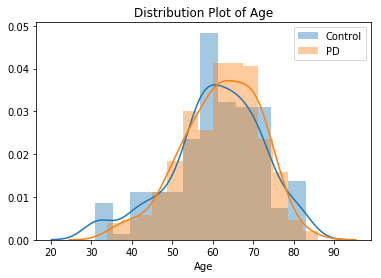

<Figure size 432x288 with 0 Axes>

In [0]:
# seaborn distribution plot
sns.distplot(df_control_bb.Age, rug=False, label='Control')
sns.distplot(df_pd_bb.Age, rug=False, label='PD')
plt.title('Distribution Plot of Age')
plt.legend()
plt.show() # pd has a slightly older distribution than control

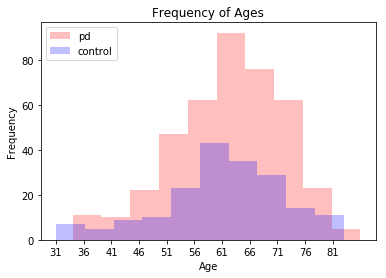

<Figure size 432x288 with 0 Axes>

In [0]:
# plot for the ages
plt.hist(df_pd_bb.Age, align='mid', alpha=0.25, color='r', label='pd', bins=10)
plt.hist(df_control_bb.Age, align='mid', alpha=0.25, color='b', label='control', bins=10)
plt.legend(loc='upper left')

# set labels
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Ages')

# set ticks
plt.xticks(np.arange(min(df_control_bb.Age), max(df_control_bb.Age)+1, 5.0))
plt.show()

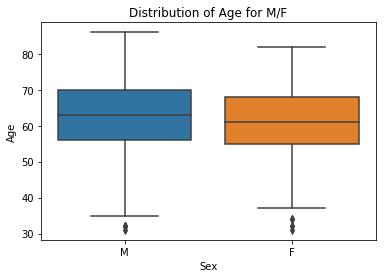

In [0]:
# some boxplots
ax = sns.boxplot(x="Sex", y="Age", data=big_boi_df)
plt.title('Distribution of Age for M/F')

In [0]:
print ("For Control:")
print (np.unique(df_control_bb.Sex.values, return_counts=True))
print ("For PD")
print (np.unique(df_pd_bb.Sex.values, return_counts=True)) # very visible from results males are more likely to get pd..

For Control:
(array(['F', 'M'], dtype=object), array([ 68, 118]))
For PD
(array(['F', 'M'], dtype=object), array([144, 266]))


In [0]:
## Load our model
model_as = pickle.load( open( "all_mprage_grappa/z_tests/keep_models/as_model.pkl", "rb" ) )

W0624 10:37:51.908953 139945683027840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 10:37:51.959050 139945683027840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 10:37:52.068157 139945683027840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0624 10:37:52.069462 139945683027840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0624 10:37:52.070528 139945683027840 depre

**Some examples of raw brainscans then down to 160x160x160**

In [0]:
# install dependencies
!pip install deepbrain; ~# semi-colon to hide the output
!pip install pydicom;

     |████████████████████████████████| 686kB 2.2MB/s 
/bin/bash: ~#: command not found
     |████████████████████████████████| 7.0MB 1.7MB/s 


In [0]:
import pydicom
import nibabel as nb
from deepbrain import Extractor

In [0]:
def filename_sort(filename):
    
    # split by underlines and delimiter
    split_line = filename.split("_")
    int_return = int(split_line[-3])
    
    return int_return

In [0]:
path = 'raw_brainscans/T1_SAG_SIEMEN_3T_CLEAN_TRY2/4065/MPRAGE_GRAPPA/2012-12-10_11_33_32.0/S180853'
ex_dcm_f = os.listdir(path)
ex_dcm_f_sorted = sorted(ex_dcm_f, key=lambda filename: filename_sort(filename))

In [0]:
# get slices
ex_slices = []
for dcm_file in ex_dcm_f_sorted:
  path_to_file = path + '/' + dcm_file
  ex_slices.append(pydicom.read_file(path_to_file).pixel_array)
ex_slices = np.array(ex_slices)
print (np.shape(ex_slices))

ex_slices_axial = ex_slices.transpose((1,2,0))
print (np.shape(ex_slices_axial))

(176, 256, 240)
(256, 240, 176)


In [0]:
# process brains
ext = Extractor()
prob = ext.run(ex_slices_axial)
mask = prob > 1e-3 # mask can be obtained as:
ex_slices_axial[~mask] = 0 # apply mask

In [0]:
# reduce to 160x160x160
ex_slices_axialt = ex_slices_axial[35:195,50:210,10:170] # for the axial plane

**Visualise Brainz**

In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets # interactive plots
import matplotlib.pyplot as plt
%matplotlib inline

slice_ex = ex_slices_axialt
def g(i): # basic slideshow plot to get an idea of the effectiveness of the mask itself
    plt.figure(figsize=(15,8)) # make plot larger
    plt.imshow(slice_ex[i])
    plt.show()
    # plt.imsave('figures/axial_processed2.png', slice_ex[i])
    return None

interact(g, i=widgets.IntSlider(min=0,max=(len(slice_ex)-1),step=1,value=103)); # 140 for axial view. 88 for sag

interactive(children=(IntSlider(value=103, description='i', max=159), Output()), _dom_classes=('widget-interac…

**Load up a batch, apply gaussian filter and save it into another folder**

In [0]:
## RUNNING THROUGH TEST DATA ##
with open('all_mprage_grappa/processed_brains/processed_brains_aug/dbatch0.pkl', 'rb') as f:
  total_slices, total_slices_info = pickle.load(f) 

In [0]:
from scipy.ndimage import gaussian_filter

for ts in total_slices[:,:,:,:,0]:
  for s in ts:
    ## apply gaussian mask
    # try with one set for 3d scans, just aug

    test_gaussian = gaussian_filter(s, sigma=1.5) # will have to play around with this to get optimal value
    56

(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(160, 160)